<a href="https://colab.research.google.com/github/Noorrizky/PCD-Kampus/blob/main/prak14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [139]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +
                                     "haarcascade_frontalface_default.xml")

In [140]:
def load_dataset(folder_path):
  images = []
  labels = []
  for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
      label = int(filename.split("_")[0]) # Ambil angka dari nama file
      img_path = os.path.join(folder_path, filename)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

      faces = face_cascade.detectMultiScale(img, 1.3, 5)
      for(x,y,w,h)in faces:
        face = img[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (200, 200))
        images.append(face_resized)
        labels.append(label)
  return images, labels

In [141]:
faces,labels = load_dataset("Dataset")

In [142]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(faces, np.array(labels))

In [143]:
def load_uji(uji_path):
  img = cv2.imread(uji_path)
  uji = cv2.imread(uji_path, cv2.IMREAD_GRAYSCALE)
  uji_faces = face_cascade.detectMultiScale(uji, 1.3,5)
  for(x,y,w,h) in uji_faces:
    wajah_uji = uji[y:y+h, x:x+w]
    wajah_uji_resized = cv2.resize(wajah_uji, (200,200))

    label, confidence = recognizer.predict(wajah_uji_resized)

    # Konversi label ke nama
    nama = {1: "mvp", 2:"remco"}.get(label, "Tidak dikenal")

    cv2.rectangle(img, (x,y),(x+w, y+h),(0,255,0),2)
    cv2.putText(img, f"{nama} ({round(confidence,2 )})", (x,y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0),2)

  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title('Pengenalan Wajah')
  plt.show()


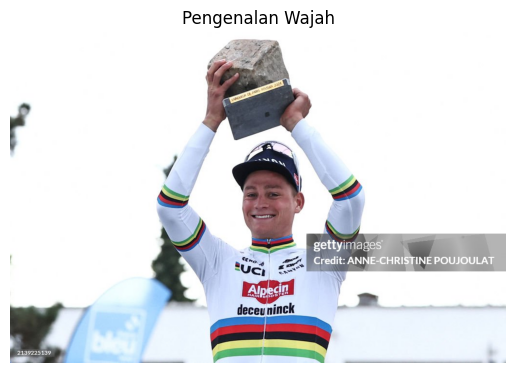

In [144]:
load_uji('uji3.jpg')


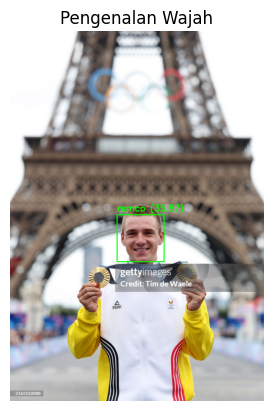

In [145]:
load_uji('uji2.jpg')